# AIT526 - 001 - Natural Language Processing
# Professor Lindi Liao
## Final Project
#### Team Members:
</br>Hanishka Reddy</br>
Meghana Katta</br>
Rishitha Madipelli</br>

#### Date: 04/18/2024

In [35]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from langdetect import detect
from bs4 import BeautifulSoup
import nltk
from indicnlp.tokenize import indic_tokenize
from imblearn.over_sampling import SMOTE
import spacy

In [60]:
# Load the dataset
df = pd.read_csv('/Users/madipellirishitha/Downloads/NLP.csv')  

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from indicnlp.tokenize import indic_tokenize

# remove the html tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    return cleaned_text

# preprocessing the english text
def preprocess_text_en(text):
    text = remove_html_tags(text)
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    return text

# preprocessing the hindi text
def preprocess_text_hi(text):
    text = remove_html_tags(text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    tokens = indic_tokenize.trivial_tokenize(text)
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    return text

# preprocessing the french text        
def preprocess_text_fr(text):
    text = remove_html_tags(text)
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    tokens = nltk.word_tokenize(text, language='french')
    stop_words = set(stopwords.words('french'))
    tokens = [word for word in tokens if not word in stop_words]
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    return text
    
# preprocessing the german text
def preprocess_text_de(text):
    text = remove_html_tags(text)
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    tokens = nltk.word_tokenize(text, language='german')
    stop_words = set(stopwords.words('german'))
    tokens = [word for word in tokens if not word in stop_words]
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    return text

# Define a function to preprocess text based on language
def preprocess(text, language):
    if language == "english":
        # Preprocess English text
        return preprocess_text_en(text)
    elif language == "hindi":
        # Preprocess Hindi text
        return preprocess_text_hi(text)
    elif language == "german":
        # Preprocess German text
        return preprocess_text_de(text)
    elif language == "french":
        # Preprocess French text
        return preprocess_text_fr(text)

# Preprocess text for each language column
for lang_column in ["english", "hindi", "german", "french"]:
    df[lang_column] = df.apply(lambda row: preprocess(row[lang_column], lang_column), axis=1)

# Combine text from all language columns
df['combined_text'] = df["english"] + " " + df["hindi"] + " " + df["german"] + " " + df["french"]

# Split data into features and labels
X = df['combined_text']
y = df['labels']  # Assuming 'label' is the column name for spam or ham classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Feature extraction using Bag-of-Words
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Oversample the training data using SMOTE
smote = SMOTE(random_state=40)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fitting the model
clf.fit(X_train_resampled, y_train_resampled)

# Predictions on the original test data
predictions = clf.predict(X_test)

/var/folders/ny/lzyfbxwx1jx2sgz0w9gblctm0000gn/T/ipykernel_8124/236061495.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Accuracy: 0.9808612440191388
Precision: 0.934010152284264
Recall: 0.9064039408866995
F1-score: 0.9200000000000002


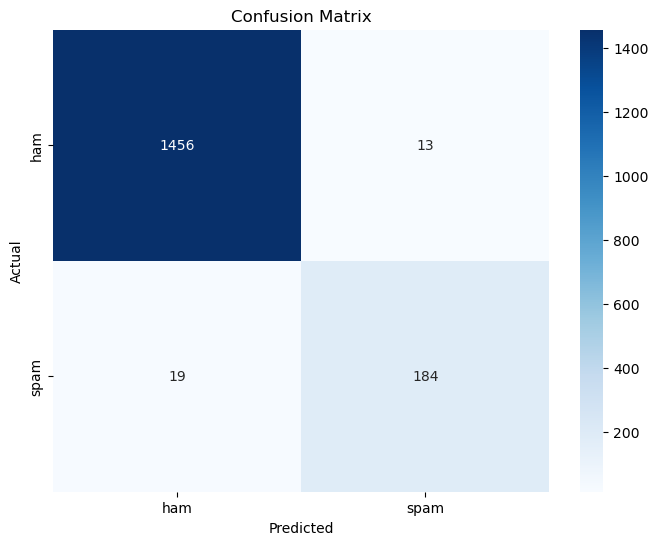

In [57]:
#evaluation for Multinomial naive bayes
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions, pos_label='spam')

# Calculate recall
recall = recall_score(y_test, predictions, pos_label='spam')
f1 = f1_score(y_test, predictions, pos_label='spam')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

import matplotlib.pyplot as plt
import seaborn as sns


conf_matrix = confusion_matrix(y_test, predictions)

# plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [61]:
#SVM
from sklearn.svm import SVC

# fitting the model
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_resampled, y_train_resampled)
svm_predictions = svm_clf.predict(X_test)

Accuracy: 0.9766746411483254
Precision: 0.9523809523809523
Recall: 0.8571428571428571
F1-score: 0.9022556390977443


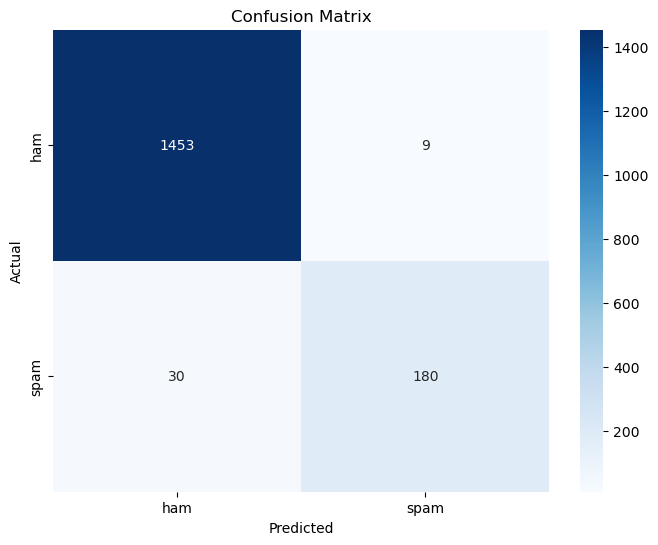

In [62]:
#SVM evaluations
from sklearn.metrics import confusion_matrix, precision_score, recall_score


# Evaluate accuracy
accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision_svm = precision_score(y_test, svm_predictions, pos_label='spam')

# Calculate recall
recall_svm = recall_score(y_test, svm_predictions, pos_label='spam')
f1_svm = f1_score(y_test, svm_predictions, pos_label='spam')
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_svm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
#lstm 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE  # Import SMOTE
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# partitions of dataset
def get_dataset_partitions_pd(df, train_split=0.8, val_split=0.1, test_split=0.1):
    assert (train_split + test_split + val_split) == 1
    assert val_split == test_split
    df_sample = df.sample(frac=1, random_state=12)
    indices_or_sections = [int(train_split * len(df)), int((1 - val_split - test_split) * len(df))]

    train_ds, val_ds, test_ds = np.split(df_sample, indices_or_sections)

    return train_ds, val_ds, test_ds

# Split dataset into train, val, and test sets
train_set, val_set, test_set = get_dataset_partitions_pd(df)

# Prepare training features and labels
train_features = []
train_labels = []
test_features = []
test_labels = []
for lang in ['english', 'hindi', 'french', 'german']:
    for index, row in test_set.iterrows():
        text = row[lang]
        label = row['labels']
        test_features.append(preprocess(text, lang))
        test_labels.append(1 if label == 'spam' else 0)  # Adjusted here

for lang in ['english', 'hindi', 'french', 'german']:
    for index, row in train_set.iterrows():
        text = row[lang]
        label = row['labels']
        train_features.append(preprocess(text, lang))
        train_labels.append(1 if label == 'spam' else 0)  # Adjusted here
        
# Convert lists to NumPy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)


In [17]:
# Tokenize and pad sequences
max_len = 20
max_words = 30000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_features)
train_sequences = tokenizer.texts_to_sequences(train_features)
train_features_padded = pad_sequences(train_sequences, maxlen=max_len)

# Define and compile the model
model = Sequential([
    Embedding(max_words, 64),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['acc'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x=train_features_padded, y=train_labels, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stop])

2024-04-18 14:41:57.852349: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-04-18 14:41:57.852476: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-18 14:41:57.852490: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-18 14:41:57.852621: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-18 14:41:57.852937: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/15


2024-04-18 14:41:58.654605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-18 14:41:58.799039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/446 [..............................] - ETA: 6:13 - loss: 0.6945 - acc: 0.4062

2024-04-18 14:41:58.971485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


446/446 [==============================] - ETA: 0s - loss: 0.1346 - acc: 0.9556

2024-04-18 14:42:05.727626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-18 14:42:05.769610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


446/446 [==============================] - 8s 16ms/step - loss: 0.1346 - acc: 0.9556 - val_loss: 0.0485 - val_acc: 0.9905
Epoch 2/15
446/446 [==============================] - 6s 13ms/step - loss: 0.0277 - acc: 0.9924 - val_loss: 0.0382 - val_acc: 0.9927
Epoch 3/15
446/446 [==============================] - 6s 13ms/step - loss: 0.0097 - acc: 0.9976 - val_loss: 0.0278 - val_acc: 0.9924
Epoch 4/15
446/446 [==============================] - 6s 13ms/step - loss: 0.0053 - acc: 0.9991 - val_loss: 0.0283 - val_acc: 0.9913
Epoch 5/15
446/446 [==============================] - 6s 13ms/step - loss: 0.0047 - acc: 0.9989 - val_loss: 0.0256 - val_acc: 0.9927
Epoch 6/15
446/446 [==============================] - 6s 13ms/step - loss: 0.0044 - acc: 0.9991 - val_loss: 0.0329 - val_acc: 0.9924
Epoch 7/15
446/446 [==============================] - 6s 13ms/step - loss: 0.0013 - acc: 0.9999 - val_loss: 0.0340 - val_acc: 0.9919
Epoch 8/15
446/446 [==============================] - 6s 13ms/step - loss: 0.001

140/140 [==============================] - 0s 2ms/step
Accuracy: 0.9786995515695067
Precision: 0.9849906191369606
Recall: 0.8578431372549019
F1-score: 0.9170305676855895
Confusion Matrix:


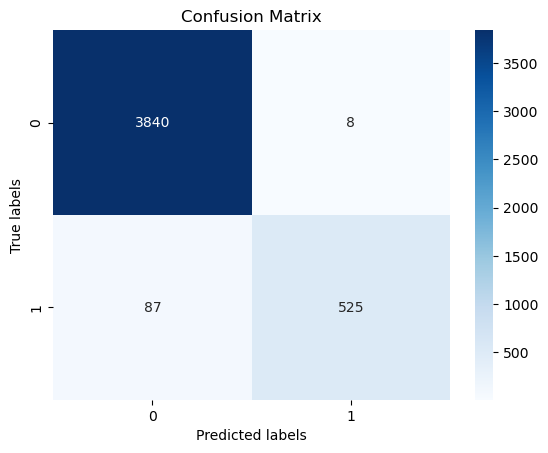

In [27]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Make predictions on the test data
test_sequences = tokenizer.texts_to_sequences(test_features)
test_features_padded = pad_sequences(test_sequences, maxlen=max_len)
predictions = model.predict(test_features_padded)

# Convert predictions to binary labels
predicted_labels = [1 if p > 0.5 else 0 for p in predictions]

# 2. Evaluate the model
accuracy = accuracy_score(test_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# 3. Build confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
#print(conf_matrix)

# Visualize confusion matrix (optional)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

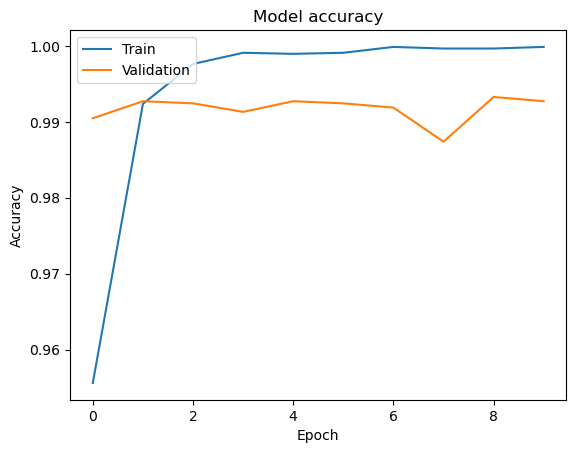

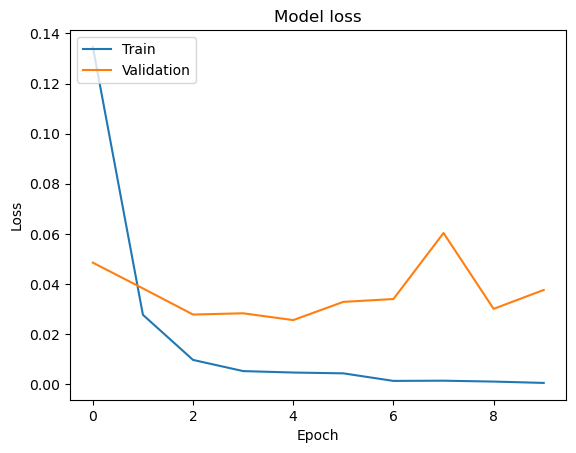

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
from langdetect import detect, detect_langs

# predictions
def pred(text):
    result = detect_langs(text)[0]
    res = str(result).split(":")[0]
    if res == 'en':
        text = preprocess_text_en(text)
    elif res == 'hi':
        text = preprocess_text_hi(text)
    elif res == 'fr':
        text = preprocess_text_fr(text)
    elif res == 'de':
        text = preprocess_text_de(text)
  
    sequences = tokenizer.texts_to_sequences([text])
    texto = pad_sequences(sequences, maxlen=max_len, padding='post')
    res = model.predict(texto)
    #print(res[0])
    return "spam" if res[0] > 0.5 else "ham"

res = pred("Congratulations! You have won a $1000 Walmart gift card.")
print(res)

x = pred("Meet me at Bhandup station at 5 PM.")
print(x)

y = pred("विजेता डब्ल्यूनर आपने 94512 पर लॉटरी संपर्क जीता है और बिल्कुल मुफ्त में एक नया घर प्राप्त करें")
print(y)

y1 = pred("Hey there!")
print(y1)

z = pred("Oh k... je regarde ici :)")
print(z)

w = pred("Freier Eintritt in 2 a wkly comp zum Gewinn FA Cup Final tkts 21. Mai 2005. Text FA bis 87121, um Eingangsfrage zu erhalten(std txt rate)T&C's gelten 08452810075over18's")
print(w)

1/1 [==============================] - 0s 14ms/step
spam
1/1 [==============================] - 0s 9ms/step
ham
1/1 [==============================] - 0s 8ms/step
spam
1/1 [==============================] - 0s 9ms/step
ham
1/1 [==============================] - 0s 8ms/step
ham
1/1 [==============================] - 0s 8ms/step
spam


# References:

https://www.kaggle.com/code/mukundiyerw21/multilingual-spam-classifier

https://stackoverflow.com/questions/35360081/naive-bayes-vs-svm-for-classifying-text-data

https://www.geeksforgeeks.org/multinomial-naive-bayes/#